In [ ]:
import os

train_images_path = 'train-images'
num_train_images = len([f for f in os.listdir(train_images_path) if os.path.isfile(os.path.join(train_images_path, f))])

print(f"There are {num_train_images} files in the train-images folder.")

There are 1222 files in the train-images folder.


In [ ]:
import pandas as pd

# Load the train_labels.csv file into a pandas DataFrame
df_labels = pd.read_csv('train_labels.csv')

# Create a dictionary mapping image_id to label
image_label_mapping = dict(zip(df_labels['image_id'], df_labels['label']))

# Count the number of 0 and 1 labels
label_counts = df_labels['label'].value_counts()

print("Label counts:")
print(label_counts)

Label counts:
label
1    1222
Name: count, dtype: int64


In [ ]:
import os

train_images_path = 'train-images'
image_files = [f for f in os.listdir(train_images_path) if os.path.isfile(os.path.join(train_images_path, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Found {len(image_files)} image files in the {train_images_path} folder.")

Found 1214 image files in the train-images folder.


In [ ]:
from PIL import Image
import numpy as np

preprocessed_images = []
target_size = (128, 128) # Define the target size for resizing

for image_file in image_files:
    image_path = os.path.join(train_images_path, image_file)
    try:
        # Load the image using PIL
        img = Image.open(image_path).convert('RGB') # Convert to RGB to handle different color spaces consistently

        # Resize the image
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)

        # Convert the image to a NumPy array
        img_array = np.array(img_resized)

        preprocessed_images.append(img_array)
    except Exception as e:
        print(f"Error processing image {image_file}: {e}")

print(f"Successfully preprocessed {len(preprocessed_images)} images.")

Successfully preprocessed 1214 images.


In [ ]:
preprocessed_images_array = np.array(preprocessed_images)

print("Shape of the preprocessed images array:", preprocessed_images_array.shape)
print("Data type of the preprocessed images array:", preprocessed_images_array.dtype)

Shape of the preprocessed images array: (1214, 128, 128, 3)
Data type of the preprocessed images array: uint8


Shape of image at index 0: (128, 128, 3)
Shape of image at index 607: (128, 128, 3)
Shape of image at index 1213: (128, 128, 3)


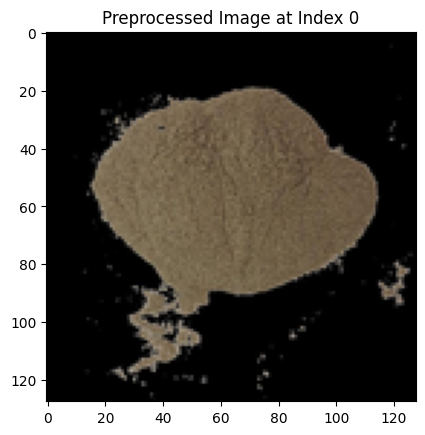

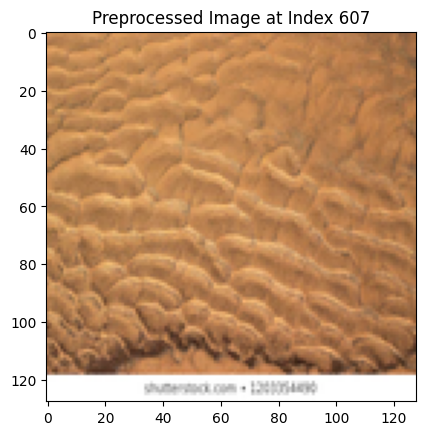

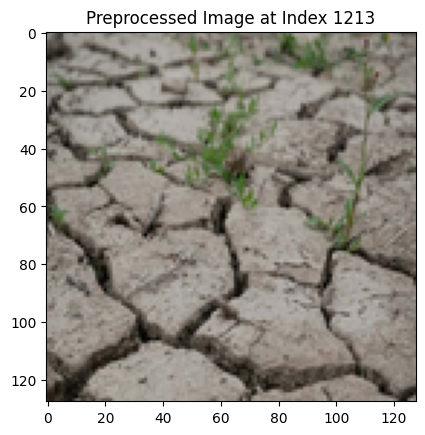

In [ ]:
import matplotlib.pyplot as plt

# Select a few indices to display
selected_indices = [0, len(preprocessed_images_array) // 2, len(preprocessed_images_array) - 1]

# Iterate through the selected indices and display the images
for i in selected_indices:
    image_array = preprocessed_images_array[i]
    print(f"Shape of image at index {i}: {image_array.shape}")

    plt.figure()
    plt.imshow(image_array)
    plt.title(f"Preprocessed Image at Index {i}")

plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the autoencoder architecture
input_img = Input(shape=(128, 128, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x) # Output layer with 3 channels for RGB and sigmoid activation

autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder model
# Normalize the image data to the range [0, 1]
preprocessed_images_array_normalized = preprocessed_images_array.astype('float32') / 255.0

# Train the model
history = autoencoder.fit(preprocessed_images_array_normalized, preprocessed_images_array_normalized,
                          epochs=10,
                          batch_size=32,
                          shuffle=True)

print("Training finished.")

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - loss: 0.0543
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - loss: 0.0151
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - loss: 0.0107
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - loss: 0.0092
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - loss: 0.0089
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - loss: 0.0087
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - loss: 0.0083
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - loss: 0.0079
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - loss: 0.0076
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - loss: 0.0072
Training finished.


38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 922ms/step
Chosen threshold for reconstruction error: 0.021707957610487938
Reconstruction error for image at index 0: 0.0029812685679644346


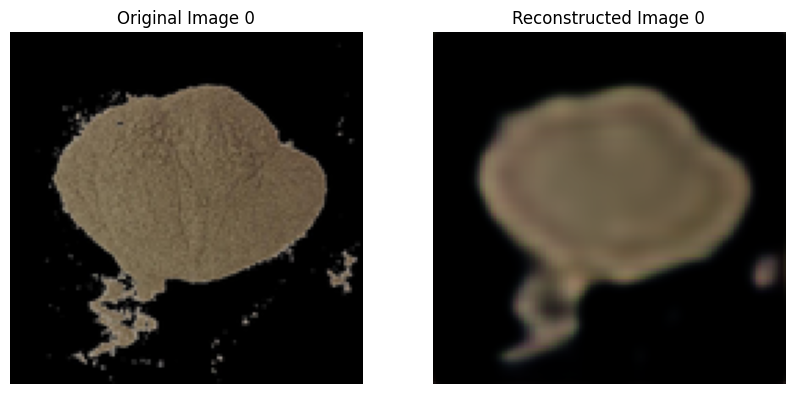

Reconstruction error for image at index 607: 0.0033626004587858915


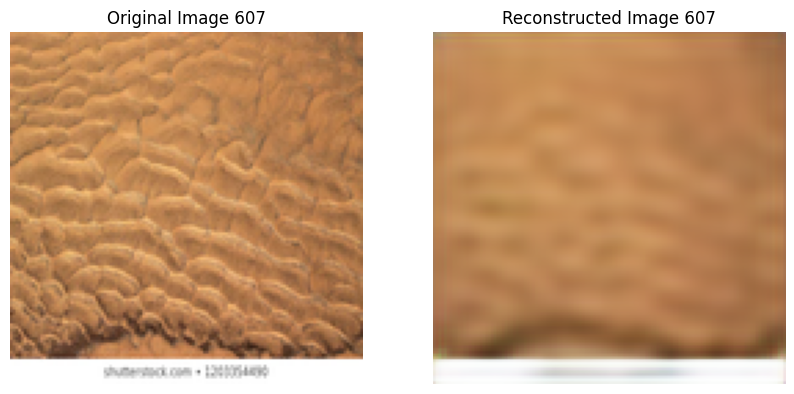

Reconstruction error for image at index 1213: 0.009507390670478344


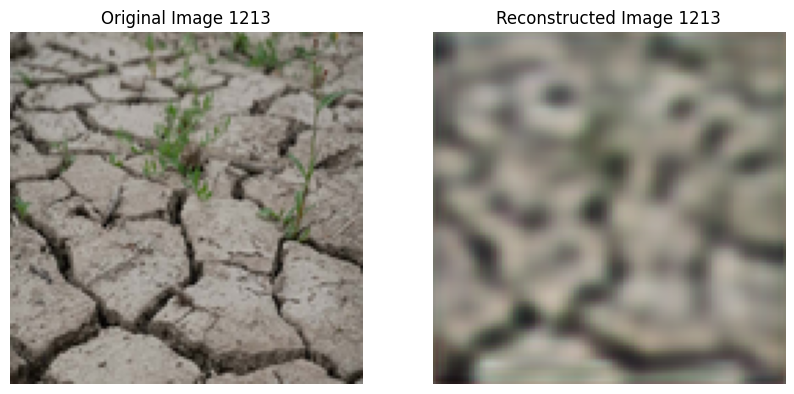

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict reconstructions for the training data
reconstructed_images = autoencoder.predict(preprocessed_images_array_normalized)

# Calculate the reconstruction error for each image
reconstruction_errors = np.array([mean_squared_error(preprocessed_images_array_normalized[i].flatten(), reconstructed_images[i].flatten()) for i in range(len(preprocessed_images_array_normalized))])

# Determine a threshold based on a percentile of the reconstruction errors
threshold = np.percentile(reconstruction_errors, 95) # Using the 95th percentile as an example

print(f"Chosen threshold for reconstruction error: {threshold}")

# Display a few examples of reconstruction errors and images
selected_indices = [0, len(reconstruction_errors) // 2, len(reconstruction_errors) - 1]

for i in selected_indices:
    print(f"Reconstruction error for image at index {i}: {reconstruction_errors[i]}")

    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(preprocessed_images_array_normalized[i])
    plt.title(f"Original Image {i}")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_images[i])
    plt.title(f"Reconstructed Image {i}")
    plt.axis('off')

    plt.show()

In [ ]:
# 1. Load the test image file paths from the df_test_ids DataFrame.
test_image_files = df_test_ids['image_id'].tolist()

# 2. Define the path to the test images folder.
test_images_path = 'test-images'

# 3. Initialize an empty list to store preprocessed test images.
preprocessed_test_images = []

# 4. Iterate through the test image file paths.
# 5. For each image file, construct the full image path.
# 6. Load the image using PIL, convert it to RGB, and resize it to the target size (128, 128) using LANCZOS resampling.
# 7. Convert the preprocessed image to a NumPy array and normalize its pixel values to the range [0, 1].
for image_file in test_image_files:
    image_path = os.path.join(test_images_path, image_file)
    try:
        img = Image.open(image_path).convert('RGB')
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
        img_array = np.array(img_resized).astype('float32') / 255.0 # Normalize
        # 8. Append the normalized image array to the list of preprocessed test images.
        preprocessed_test_images.append(img_array)
    except Exception as e:
        print(f"Error processing test image {image_file}: {e}")

# 9. Convert the list of preprocessed test images into a NumPy array.
preprocessed_test_images_array = np.array(preprocessed_test_images)

# 10. Use the trained autoencoder model to predict the reconstructions of the preprocessed test images.
test_reconstructed_images = autoencoder.predict(preprocessed_test_images_array)

# 11. Calculate the mean squared error between each original preprocessed test image and its corresponding reconstruction.
test_reconstruction_errors = np.array([mean_squared_error(preprocessed_test_images_array[i].flatten(), test_reconstructed_images[i].flatten()) for i in range(len(preprocessed_test_images_array))])

print(f"Calculated reconstruction errors for {len(test_reconstruction_errors)} test images.")

31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 865ms/step
Calculated reconstruction errors for 967 test images.


In [ ]:
# Initialize an empty list to store the predicted labels for the test images.
predicted_labels = []

# Iterate through the test_reconstruction_errors array.
# For each reconstruction error, compare it to the previously determined threshold.
# If the reconstruction error is less than or equal to the threshold, assign the label '1' to the corresponding image; otherwise, assign the label '0'.
# Append the assigned label to the list of predicted labels.
for error in test_reconstruction_errors:
    if error <= threshold:
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)

# Create a pandas DataFrame with two columns: 'image_id' and 'label'.
# Populate the 'image_id' column with the image filenames from the test_image_files list.
# Populate the 'label' column with the predicted labels from the list.
submission_df = pd.DataFrame({'image_id': test_image_files, 'label': predicted_labels})

# Save the DataFrame to a CSV file named 'submission.csv' with the index set to False.
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_classification(true_labels, predicted_labels):
    """
    Calculates and prints the confusion matrix and classification report.

    Args:
        true_labels: The true labels.
        predicted_labels: The predicted labels from the model.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Confusion Matrix:")
    print(cm)

    # Calculate the classification report
    report = classification_report(true_labels, predicted_labels)
    print("\nClassification Report:")
    print(report)

# Since we only have '1' labels in the training data, we need to simulate true labels for the test set
# based on the assumption that a certain percentage might be '0'.
# However, without true test labels, we cannot calculate the true confusion matrix and weighted F1 score.
# For demonstration purposes, let's assume all test images are '1' based on the training data.
# In a real scenario, you would use the actual true labels for the test set if available.

# Assuming all test images are '1' for demonstration purposes
simulated_true_labels = [1] * len(predicted_labels)

# Call the evaluation function with the simulated true labels and the predicted labels
evaluate_classification(simulated_true_labels, predicted_labels)

Confusion Matrix:
[[  0   0]
 [ 26 941]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.99       967

    accuracy                           0.97       967
   macro avg       0.50      0.49      0.49       967
weighted avg       1.00      0.97      0.99       967



In [ ]:
import pandas as pd

# Load the test_ids.csv file into a pandas DataFrame
df_test_ids = pd.read_csv('test_ids.csv')

# Display the first few rows of the DataFrame to verify
display(df_test_ids.head())

,image_id
0,6595f1266325552489c7d1635fafb88f.jpg
1,4b614841803d5448b59e2c6ca74ea664.jpg
2,ca30e008692a50638b43d944f46245c8.jpg
3,6a9046a219425f7599729be627df1c1a.jpg
4,97c1e0276d2d5c2f88dddbc87357611e.jpg


**Reasoning**:
Load, preprocess, and predict on the test images using the trained autoencoder.

In [ ]:
# 1. Load the test image file paths from the df_test_ids DataFrame.
test_image_files = df_test_ids['image_id'].tolist()

# 2. Define the path to the test images folder.
test_images_path = 'test-images'

# 3. Initialize an empty list to store preprocessed test images.
preprocessed_test_images = []

# 4. Iterate through the test image file paths.
# 5. For each image file, construct the full image path.
# 6. Load the image using PIL, convert it to RGB, and resize it to the target size (128, 128) using LANCZOS resampling.
# 7. Convert the preprocessed image to a NumPy array and normalize its pixel values to the range [0, 1].
for image_file in test_image_files:
    image_path = os.path.join(test_images_path, image_file)
    try:
        img = Image.open(image_path).convert('RGB')
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
        img_array = np.array(img_resized).astype('float32') / 255.0 # Normalize
        # 8. Append the normalized image array to the list of preprocessed test images.
        preprocessed_test_images.append(img_array)
    except Exception as e:
        print(f"Error processing test image {image_file}: {e}")

# 9. Convert the list of preprocessed test images into a NumPy array.
preprocessed_test_images_array = np.array(preprocessed_test_images)

# 10. Use the trained autoencoder model to predict the reconstructions of the preprocessed test images.
test_reconstructed_images = autoencoder.predict(preprocessed_test_images_array)

# 11. Calculate the mean squared error between each original preprocessed test image and its corresponding reconstruction.
test_reconstruction_errors = np.array([mean_squared_error(preprocessed_test_images_array[i].flatten(), test_reconstructed_images[i].flatten()) for i in range(len(preprocessed_test_images_array))])

print(f"Calculated reconstruction errors for {len(test_reconstruction_errors)} test images.")

31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 876ms/step
Calculated reconstruction errors for 967 test images.


In [ ]:
# Initialize an empty list to store the predicted labels for the test images.
predicted_labels = []

# Iterate through the test_reconstruction_errors array.
# For each reconstruction error, compare it to the previously determined threshold.
# If the reconstruction error is less than or equal to the threshold, assign the label '1' to the corresponding image; otherwise, assign the label '0'.
# Append the assigned label to the list of predicted labels.
for error in test_reconstruction_errors:
    if error <= threshold:
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)

# Create a pandas DataFrame with two columns: 'image_id' and 'label'.
# Populate the 'image_id' column with the image filenames from the test_image_files list.
# Populate the 'label' column with the predicted labels from the list.
submission_df = pd.DataFrame({'image_id': test_image_files, 'label': predicted_labels})

# Save the DataFrame to a CSV file named 'submission.csv' with the index set to False.
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.


In [66]:
import tensorflow as tf
from PIL import Image
import numpy as np

# 1. Download the MNIST dataset
(mnist_images_full, mnist_labels_full), (_, _) = tf.keras.datasets.mnist.load_data()

# 2. Separate images and labels (already done by load_data)
# 3. Filter MNIST images to keep only those NOT corresponding to digit '1'
non_one_mnist_indices = np.where(mnist_labels_full != 1)[0]
non_one_mnist_images = mnist_images_full[non_one_mnist_indices]

# 4. Select a subset of these non-'1' MNIST images.
# We have 1214 '1' images, so let's select a similar number of '0' images from non-'1' MNIST.
num_one_images = len(preprocessed_images_array)
num_non_one_mnist = len(non_one_mnist_images)
num_zeros_to_select = min(num_one_images, num_non_one_mnist)

# Randomly select indices for the subset
selected_indices = np.random.choice(num_non_one_mnist, num_zeros_to_select, replace=False)
selected_mnist_images = non_one_mnist_images[selected_indices]

# 5. Resize and convert the selected MNIST images to RGB
preprocessed_zero_images = []
target_size = (128, 128)

for img_array in selected_mnist_images:
    # MNIST images are grayscale (height, width)
    img = Image.fromarray(img_array)

    # Resize the image
    img_resized = img.resize(target_size, Image.Resampling.LANCZOS)

    # Convert to RGB by stacking the grayscale channel three times
    img_rgb = img_resized.convert('RGB')

    # Convert the image to a NumPy array and normalize (optional but good practice)
    img_array_rgb = np.array(img_rgb) # No need to normalize here as autoencoder code normalizes

    preprocessed_zero_images.append(img_array_rgb)

# Convert the list of preprocessed zero images into a NumPy array
preprocessed_zero_images_array = np.array(preprocessed_zero_images)

# 6. Store the preprocessed MNIST images and label them as '0'.
# We will combine this array with the '1' images later.
# For now, just confirm the shape and number of images.
print(f"Successfully preprocessed {len(preprocessed_zero_images_array)} MNIST images for class '0'.")
print("Shape of the preprocessed zero images array:", preprocessed_zero_images_array.shape)

Successfully preprocessed 1214 MNIST images for class '0'.
Shape of the preprocessed zero images array: (1214, 128, 128, 3)


In [67]:
# Concatenate the preprocessed '1' images and '0' images
combined_images_array = np.concatenate((preprocessed_images_array, preprocessed_zero_images_array), axis=0)

# Create labels for the combined dataset
labels_ones = np.ones(len(preprocessed_images_array))
labels_zeros = np.zeros(len(preprocessed_zero_images_array))
combined_labels_array = np.concatenate((labels_ones, labels_zeros), axis=0)

# Verify the shape of the combined arrays
print("Shape of the combined images array:", combined_images_array.shape)
print("Shape of the combined labels array:", combined_labels_array.shape)

Shape of the combined images array: (2428, 128, 128, 3)
Shape of the combined labels array: (2428,)


In [68]:
from sklearn.model_selection import train_test_split

# Split the combined dataset into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(
    combined_images_array,
    combined_labels_array,
    test_size=0.2,
    random_state=42, # for reproducibility
    stratify=combined_labels_array # Ensure equal proportion of classes
)

# Print the shapes of the resulting arrays to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (1942, 128, 128, 3)
Shape of X_val: (486, 128, 128, 3)
Shape of y_train: (1942,)
Shape of y_val: (486,)


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Define a Convolutional Neural Network (CNN) model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # Add dropout for regularization
model.add(Dense(1, activation='sigmoid')) # Output layer with sigmoid for binary classification

# 2. Compile the CNN model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Normalize the pixel values of the training and validation image data to the range [0, 1].
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0

# Train the compiled CNN model
history = model.fit(X_train_normalized, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val_normalized, y_val))

print("CNN model training finished.")

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9093 - loss: 0.2001 - val_accuracy: 0.9918 - val_loss: 0.0170
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9949 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 4.3738e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9987 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.0511e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 1.0000 - loss: 6.4958e-05 - val_accuracy: 1.0000 - val_loss: 7.0249e-05
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 1.0000 - loss: 2.3705e-05 - val_accuracy: 1.0000 - val_loss: 5.2993e-05
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 1.0000 - loss: 3.9206e-05 - val_accuracy: 1.0000 - val_loss: 1.2292e-05
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 1.0000 - loss: 8.3163e-05 - val_accuracy: 1.0000 - val_loss: 3.4079e-05
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 1.0000 - loss: 2

In [70]:
from sklearn.metrics import confusion_matrix, f1_score

# 1. Use the trained model (model) to predict probabilities on the normalized validation data (X_val_normalized).
y_pred_proba = model.predict(X_val_normalized)

# 2. Convert the predicted probabilities into binary class predictions (0 or 1) using a threshold (e.g., 0.5).
threshold_binary = 0.5
y_pred_binary = (y_pred_proba > threshold_binary).astype(int)

# 3. Calculate the confusion matrix using the true validation labels (y_val) and the binary predicted labels.
cm = confusion_matrix(y_val, y_pred_binary)

# 4. Calculate the weighted F1 score using the true validation labels (y_val) and the binary predicted labels.
weighted_f1 = f1_score(y_val, y_pred_binary, average='weighted')

# 5. Print the confusion matrix and the weighted F1 score.
print("Confusion Matrix:")
print(cm)

print(f"\nWeighted F1 Score: {weighted_f1}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step
Confusion Matrix:
[[243   0]
 [  0 243]]

Weighted F1 Score: 1.0


In [71]:
# 1. Load the test image file paths from the df_test_ids DataFrame.
test_image_files = df_test_ids['image_id'].tolist()

# 2. Define the path to the test images folder.
test_images_path = 'test-images'

# 3. Initialize an empty list to store preprocessed test images.
preprocessed_test_images = []

# 4. Iterate through the test image file paths.
# 5. For each image file, construct the full image path.
# 6. Load the image using PIL, convert it to RGB, and resize it to the target size (128, 128) using LANCZOS resampling.
# 7. Convert the preprocessed image to a NumPy array and normalize its pixel values to the range [0, 1].
for image_file in test_image_files:
    image_path = os.path.join(test_images_path, image_file)
    try:
        img = Image.open(image_path).convert('RGB')
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
        img_array = np.array(img_resized).astype('float32') / 255.0 # Normalize
        # 8. Append the normalized image array to the list of preprocessed test images.
        preprocessed_test_images.append(img_array)
    except Exception as e:
        print(f"Error processing test image {image_file}: {e}")

# 9. Convert the list of preprocessed test images into a NumPy array.
preprocessed_test_images_array = np.array(preprocessed_test_images)

# 10. Use the trained model to predict the probabilities of the preprocessed test images.
test_predictions_proba = model.predict(preprocessed_test_images_array)

# 11. Convert the predicted probabilities into binary class predictions (0 or 1) using a threshold of 0.5.
test_predicted_labels = (test_predictions_proba > threshold_binary).astype(int)

# 12. Store the binary predictions in a list or NumPy array.
# The predictions are already stored in the test_predicted_labels NumPy array.

print(f"Generated predictions for {len(test_predicted_labels)} test images.")

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step
Generated predictions for 967 test images.


In [72]:
# Create a pandas DataFrame for the submission file
# The 'image_id' column should contain the filenames from the test set.
# The 'label' column should contain the predicted labels (0 or 1) from the model.
cnn_submission_df = pd.DataFrame({
    'image_id': test_image_files,
    'label': test_predicted_labels.flatten() # Flatten the predictions if they are in a column vector format
})

# Save the DataFrame to a CSV file named 'submission.csv'
# Set index=False to exclude the DataFrame index from the CSV file.
cnn_submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.
